In [1]:
import pandas as pd

matches = pd.read_csv("csvmatches2.csv")

In [2]:
### Data Wrangling 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

import statsmodels.api as sm
from scipy import stats

from imblearn.over_sampling import SMOTE

### Modelling 

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg

### Tabulating the results

from tabulate import tabulate

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
matches['Ball Type'] = matches['Ball Type'].str.strip().str.lower()

In [4]:
matches = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB','Current_score','Target','Ball Type', 'Shot Type','Prev_ball_type','Previ_shot_type']]

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()


matches['Ball Type'] = label_encoder1.fit_transform(matches['Ball Type'])






In [6]:
label_encoder3 = LabelEncoder()

matches['Prev_ball_type'] = label_encoder3.fit_transform(matches['Prev_ball_type'])

label_encoder4 = LabelEncoder()

matches['Previ_shot_type'] = label_encoder4.fit_transform(matches['Previ_shot_type'])

# Data Preprocessing


In [7]:
accuracy = OrderedDict()
precision = OrderedDict()
recall = OrderedDict()
f1 = OrderedDict()
specificity = OrderedDict()
sensitivity = OrderedDict()

accuracy2 = OrderedDict()
precision2 = OrderedDict()
recall2 = OrderedDict()
f12 = OrderedDict()
specificity2 = OrderedDict()
sensitivity2 = OrderedDict()

In [8]:
metrics = {}
metrics2 = {}

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming X and y are already defined and are your features and target variable
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']
# Label encode categorical variables
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Apply SMOTE to the entire dataset


# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and fit the model with the best parameters
    knn_model = KNeighborsClassifier(n_neighbors=6)
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)


Mean Accuracy: 0.6418659757285854
Mean Precision: 0.6252840125295468
Mean Recall: 0.6418659757285854
Mean F1 Score: 0.6210227880475498
Mean Specificity: 0.5899999814032233


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
# ...

# Split the data into features (X) and labels (y)
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

# Define the number of folds for stratified sampling
n_splits = 10
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Initialize metrics dictionary
metrics = {}

# Perform stratified cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define the KNN algorithm
    def knn_predict(X_train, y_train, X_test, k):
        y_pred = []
        for x in X_test.values:
            # Calculate distances to all training points
            distances = [np.linalg.norm(x - x_train) for x_train in X_train.values]

            # Get indices of k-nearest neighbors
            indices = np.argsort(distances)[:k]

            # Get the labels of the k-nearest neighbors
            k_nearest_labels = [y_train.iloc[i] for i in indices]

            # Predict the class label based on majority vote
            prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(prediction)

        return y_pred

    # Choose the value of k
    k = 6

    # Make predictions using KNN
    y_pred = knn_predict(X_train, y_train, X_test, k)

    # Evaluate the accuracy of the model
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)

metrics["KNN Classifier before SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for KNN Classifier before SMOTE:")
print(metrics["KNN Classifier before SMOTE"])


   


Fold 1
Confusion Matrix:
 [[92 28  1]
 [33 37  1]
 [ 9  9  3]]
Accuracy: 0.6197183098591549
Precision: 0.6158433186181768
Recall: 0.6197183098591549
F1 Score: 0.6027720212504375
Specificity: 0.7666666666666667
Sensitivity: 0.5285714285714286


Fold 2
Confusion Matrix:
 [[86 34  1]
 [29 40  2]
 [10  9  2]]
Accuracy: 0.6009389671361502
Precision: 0.590914870750608
Recall: 0.6009389671361502
F1 Score: 0.5855188362917665
Specificity: 0.7166666666666667
Sensitivity: 0.5797101449275363


Fold 3
Confusion Matrix:
 [[93 27  1]
 [33 33  4]
 [ 8 10  3]]
Accuracy: 0.6084905660377359
Precision: 0.5889274148127288
Recall: 0.6084905660377359
F1 Score: 0.5924700524321636
Specificity: 0.775
Sensitivity: 0.5


Fold 4
Confusion Matrix:
 [[98 23  0]
 [35 33  2]
 [11  7  3]]
Accuracy: 0.6320754716981132
Precision: 0.6208202306079665
Recall: 0.6320754716981132
F1 Score: 0.6088553564814081
Specificity: 0.8099173553719008
Sensitivity: 0.4852941176470588


Fold 5
Confusion Matrix:
 [[90 30  2]
 [26 39  5]
 [ 

In [ ]:
#KNN with smote
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
# ...

# Split the data into features (X) and labels (y)
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define the number of folds for stratified sampling
n_splits = 10
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Initialize metrics dictionary
metrics = {}

# Perform stratified cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Define the KNN algorithm
    def knn_predict(X_train, y_train, X_test, k):
        y_pred = []
        for x in X_test.values:
            # Calculate distances to all training points
            distances = [np.linalg.norm(x - x_train) for x_train in X_train.values]

            # Get indices of k-nearest neighbors
            indices = np.argsort(distances)[:k]

            # Get the labels of the k-nearest neighbors
            k_nearest_labels = [y_train.iloc[i] for i in indices]

            # Predict the class label based on majority vote
            prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(prediction)

        return y_pred

    # Choose the value of k
    k = 6

    # Make predictions using KNN
    y_pred = knn_predict(X_train, y_train, X_test, k)

    # Evaluate the accuracy of the model
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)

metrics2["KNN Classifier after SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for KNN Classifier after SMOTE:")
print(metrics2["KNN Classifier after SMOTE"])


   


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd  # Import pandas for DataFrame operations

# Assuming X and y are already defined and are your features and target variable

# Label encode categorical variables
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le



# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and fit the model with the best parameters
    knn_model = KNeighborsClassifier(n_neighbors=6)
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)


# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd  # Import pandas for DataFrame operations

# Assuming X and y are already defined and are your features and target variable

# Label encode categorical variables
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert X_resampled to DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# Standardize features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

    # Create and fit the model with the best parameters
    knn_model = KNeighborsClassifier(n_neighbors=6)
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)


# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)


In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
mean_recall


In [ ]:
confusion

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Using the previously loaded data


# Selecting the relevant features and target
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

# Encoding categorical variables
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Stratified K-Fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Initialize variables to store metrics across folds
metrics = {}
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
specificity_scores, sensitivity_scores = [], []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the SVM model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN, FP, FN, TP = confusion.ravel()
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

metrics["SVM Classifier before SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Specificity": mean_specificity,
    "Sensitivity": mean_sensitivity
}

# Print the metrics
metrics_summary = metrics["SVM Classifier before SMOTE"]
metrics_summary



In [ ]:
# SVM without SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score





# Split the dataset into features (X) and target (y)
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
# Split the data into training and testing sets (80% train, 20% test)
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    

    # Create an SVM classifier with a linear kernel (you can try other kernels as well)
    

# Train the SVM model
    svm_model.fit(X_train, y_train)

# Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Make predictions on the test data
   

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)

metrics["SVM Classifier before SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for SVM Classifier before SMOTE:")
print(metrics["SVM Classifier before SMOTE"])


# You can now use this trained model to predict shot selection for new data points.
# For example, to predict shot selection for a new instance, you can use:
# new_data = [[new_ball_type_encoded, new_run_rate_per_ball, new_innings_ball]]
# new_data = scaler.transform(new_data)  # Standardize the new data
# predicted_shot_selection = svm_model.predict(new_data)


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Using the previously loaded data
matches = data

# Selecting the relevant features and target
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

# Encoding categorical variables
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Stratified K-Fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Initialize variables to store metrics across folds
metrics = {}
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
specificity_scores, sensitivity_scores = [], []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the SVM model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN, FP, FN, TP = confusion.ravel()
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)


metrics["SVM Classifier before SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Specificity": mean_specificity,
    
}

# Print the metrics
metrics_summary = metrics["SVM Classifier before SMOTE"]
metrics_summary



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming X and y are already defined and are your features and target variable

# Best parameters from Grid Search
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']


# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
specificity_scores, sensitivity_scores = [], []
specificity_scores = []

label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Apply SMOTE to the entire dataset (for simplification)


# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform cross-validation
# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and fit the model with the best parameters
    model = SVC(kernel='linear', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)

In [ ]:
from imblearn.over_sampling import SMOTE

# Reinitialize metrics for the model after applying SMOTE
smote_accuracy_scores, smote_precision_scores, smote_recall_scores, smote_f1_scores = [], [], [], []

# Perform cross-validation with SMOTE
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Standardize the features after SMOTE
    scaler = StandardScaler()
    X_train_smote = scaler.fit_transform(X_train_smote)
    X_test = scaler.transform(X_test)

    # Train the SVM model on the over-sampled dataset
    svm_model.fit(X_train_smote, y_train_smote)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model's performance
    smote_accuracy = accuracy_score(y_test, y_pred)
    smote_precision = precision_score(y_test, y_pred, average='weighted')
    smote_recall = recall_score(y_test, y_pred, average='weighted')
    smote_f1 = f1_score(y_test, y_pred, average='weighted')

    # Append scores to the lists
    smote_accuracy_scores.append(smote_accuracy)
    smote_precision_scores.append(smote_precision)
    smote_recall_scores.append(smote_recall)
    smote_f1_scores.append(smote_f1)

# Calculate mean scores across folds after SMOTE
smote_mean_accuracy = np.mean(smote_accuracy_scores)
smote_mean_precision = np.mean(smote_precision_scores)
smote_mean_recall = np.mean(smote_recall_scores)
smote_mean_f1 = np.mean(smote_f1_scores)

metrics["SVM Classifier after SMOTE"] = {
    "Accuracy": smote_mean_accuracy,
    "Precision": smote_mean_precision,
    "Recall": smote_mean_recall,
    "F1 Score": smote_mean_f1
}

# Print the metrics after applying SMOTE
smote_metrics_summary = metrics["SVM Classifier after SMOTE"]
smote_metrics_summary



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# Load your data
# X, y = your_dataset_features, your_dataset_target

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Create a GridSearchCV object
svm = SVC(random_state=42)
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1, n_jobs=-1)

# Apply SMOTE and standardize features
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
scaler = StandardScaler()
X_smote = scaler.fit_transform(X_smote)

# Run grid search
grid_search.fit(X_smote, y_smote)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming X and y are already defined and are your features and target variable

# Best parameters from Grid Search
best_params = {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
specificity_scores, sensitivity_scores = [], []
specificity_scores = []

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Apply SMOTE to the entire dataset (for simplification)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Standardize features
scaler = StandardScaler()
X_smote = scaler.fit_transform(X_smote)

# Perform cross-validation
# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    # Create and fit the model with the best parameters
    model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)

In [ ]:
# SVM with SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix




# Split the dataset into features (X) and target (y)
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets

# Standardize features (normalize numerical features)


# Create an SVM classifier with a linear kernel (you can try other kernels as well)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model


# Evaluate the model's performance
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
   

    # Create an SVM classifier with a linear kernel (you can try other kernels as well)
   

# Train the SVM model
    svm_model.fit(X_train, y_train)

# Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Make predictions on the test data
   

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)

metrics2["SVM Classifier after SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for SVM Classifier after SMOTE:")
print(metrics2["SVM Classifier after SMOTE"])


# You can now use this trained model to predict shot selection for new data points.
# For example, to predict shot selection for a new instance, you can use:
# new_data = [[new_ball_type_encoded, new_run_rate_per_ball, new_innings_ball]]
# new_data = scaler.transform(new_data)  # Standardize the new data
# predicted_shot_selection = svm_model.predict(new_data)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming X and y are already defined and are your features and target variable

# Best parameters from Grid Search
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']


# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
specificity_scores, sensitivity_scores = [], []
specificity_scores = []

label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Apply SMOTE to the entire dataset (for simplification)


# Standardize features


# Perform cross-validation
# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and fit the model with the best parameters
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)

In [ ]:
# RF without SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']



# Split the resampled data into training and testing sets


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the Random Forest classifier on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Calculate specificity and sensitivity
    
    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


metrics["Random Forest Classifier before SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Random Forest Classifier before SMOTE:")
print(metrics["Random Forest Classifier before SMOTE"])

In [ ]:
# RF with SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Apply SMOTE to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the Random Forest classifier on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []


# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Calculate specificity and sensitivity
   

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
   

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
   
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)


print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)



metrics2["Random Forest Classifier after SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    
    "Specificity": mean_specificity
}

# Print the metrics
print("Metrics for Random Forest Classifier after SMOTE:")
print(metrics2["Random Forest Classifier after SMOTE"])

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming X and y are already defined and are your features and target variable

# Label encode categorical variables
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Apply SMOTE to the entire dataset


# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and fit the model with the best parameters
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)


KeyError: "None of [Int64Index([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,\n            ...\n            2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121],\n           dtype='int64', length=1909)] are in the [columns]"

In [17]:
#NB without SMOTE
import pandas as pd
import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.classes = np.unique(y)

        for class_ in self.classes:
            # Calculate class probabilities
            class_mask = (y == class_)
            self.class_probs[class_] = sum(class_mask) / num_samples

            # Calculate feature probabilities for each class
            self.feature_probs[class_] = {}
            for feature in X.columns:
                feature_values = X[feature].unique()
                self.feature_probs[class_][feature] = {}
                for value in feature_values:
                    value_mask = (X[feature] == value)
                    self.feature_probs[class_][feature][value] = (sum(class_mask & value_mask) + 1) / (sum(class_mask) + len(feature_values))

    def predict(self, X):
        predictions = []
        for index, row in X.iterrows():
            class_scores = {class_: np.log(self.class_probs[class_]) for class_ in self.classes}
            for class_ in self.classes:
                for feature, value in row.items():
                    if value in self.feature_probs[class_][feature]:
                        class_scores[class_] += np.log(self.feature_probs[class_][feature][value])
            predictions.append(max(class_scores, key=class_scores.get))
        return predictions

# Example usage:
# Example usage:
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



clf = NaiveBayesClassifier()
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
# ... (previous code)

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate specificity and sensitivity
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    specificity = TN / (TN + FP)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)

# Update the metrics dictionary
metrics["Naive Bayes Classifier before SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Specificity": mean_specificity  # Use the correct variable name
}

# Print the metrics
print("Metrics for Naive Bayes Classifier before SMOTE:")
print(metrics["Naive Bayes Classifier before SMOTE"])


Fold 1
Confusion Matrix:
 [[ 87  22  12]
 [ 45  60  17]
 [  9  11 102]]
Accuracy: 0.6821917808219178
Precision: 0.6804427898620649
Recall: 0.6821917808219178
F1 Score: 0.6762283380376559
Specificity: 0.7981651376146789


Fold 2
Confusion Matrix:
 [[87 27  7]
 [54 59  9]
 [21 10 91]]
Accuracy: 0.6493150684931507
Precision: 0.6677196095724454
Recall: 0.6493150684931507
F1 Score: 0.6503922072739102
Specificity: 0.7631578947368421


Fold 3
Confusion Matrix:
 [[91 20 10]
 [48 65  9]
 [17 21 84]]
Accuracy: 0.6575342465753424
Precision: 0.6709309581345706
Recall: 0.6575342465753424
F1 Score: 0.6579631284828957
Specificity: 0.8198198198198198


Fold 4
Confusion Matrix:
 [[90 24  7]
 [39 74  9]
 [10 13 99]]
Accuracy: 0.7205479452054795
Precision: 0.7252184767968828
Recall: 0.7205479452054795
F1 Score: 0.7210598455723338
Specificity: 0.7894736842105263


Fold 5
Confusion Matrix:
 [[ 87  23  11]
 [ 38  64  20]
 [ 12  10 100]]
Accuracy: 0.6876712328767123
Precision: 0.6862028285248913
Recall: 0.68

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd

# Assuming X and y are already defined and are your features and target variable

# Apply SMOTE to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = nb_classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd

# Assuming X and y are already defined and are your features and target variable

# Apply SMOTE to address class imbalance


# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = nb_classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import numpy as np
import pandas as pd

# Assuming X and y are already defined and are your features and target variable

# Apply SMOTE to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize metrics
scoring = {'accuracy': 'accuracy',
           'precision_weighted': make_scorer(precision_score, average='weighted'),
           'recall_weighted': make_scorer(recall_score, average='weighted'),
           'f1_weighted': make_scorer(f1_score, average='weighted')}

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Define the hyperparameter grid for grid search
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(nb_classifier, param_grid, scoring=scoring, refit='f1_weighted', cv=stratified_kfold)

# Perform grid search with cross-validation
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_nb_classifier = grid_search.best_estimator_

# Initialize metrics lists
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

# Perform cross-validation with the best model
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the best model on the training data
    best_nb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_nb_classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd

# Assuming X and y are already defined and are your features and target variable

# Apply SMOTE to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = nb_classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity (One-vs-Rest)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)


In [ ]:
#NB with SMOTE
import pandas as pd
import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.classes = np.unique(y)

        for class_ in self.classes:
            # Calculate class probabilities
            class_mask = (y == class_)
            self.class_probs[class_] = sum(class_mask) / num_samples

            # Calculate feature probabilities for each class
            self.feature_probs[class_] = {}
            for feature in X.columns:
                feature_values = X[feature].unique()
                self.feature_probs[class_][feature] = {}
                for value in feature_values:
                    value_mask = (X[feature] == value)
                    self.feature_probs[class_][feature][value] = (sum(class_mask & value_mask) + 1) / (sum(class_mask) + len(feature_values))

    def predict(self, X):
        predictions = []
        for index, row in X.iterrows():
            class_scores = {class_: np.log(self.class_probs[class_]) for class_ in self.classes}
            for class_ in self.classes:
                for feature, value in row.items():
                    if value in self.feature_probs[class_][feature]:
                        class_scores[class_] += np.log(self.feature_probs[class_][feature][value])
            predictions.append(max(class_scores, key=class_scores.get))
        return predictions

# Example usage:
# Example usage:
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets

clf = NaiveBayesClassifier()
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


metrics2["Naive Bayes Classifier after SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Naive Bayes Classifier after SMOTE:")
print(metrics2["Naive Bayes Classifier after SMOTE"])

In [ ]:
# Decision Tree without SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)


# Split the dataset into features (X) and target (y)
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']


# Create a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    decision_tree_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = decision_tree_model.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Calculate specificity and sensitivity
    

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)



metrics["Decision Tree Classifier before SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Decision Tree Classifierr before SMOTE:")
print(metrics["Decision Tree Classifier before SMOTE"])

In [ ]:
# Decision Tree with SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)


# Split the dataset into features (X) and target (y)
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Split the data into training and testing sets (80% train, 20% test)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets

# Create a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    decision_tree_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = decision_tree_model.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])
    # Calculate specificity and sensitivity
    

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)



metrics2["Decision Tree Classifier after SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Decision Tree Classifierr after SMOTE:")
print(metrics2["Decision Tree Classifier after SMOTE"])

In [ ]:
#Logistic Regression without SMOTE
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your data (oversampled)
# Ensure you've performed oversampling and have the X_resampled and y_resampled data
# X_resampled and y_resampled should be the result of SMOTE or any other oversampling method

# Split the data into training and testing sets
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Create and train the Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)  # You can adjust max_iter and other hyperparameters


stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    lr_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lr_classifier.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Calculate specificity and sensitivity
    

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)


print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)



metrics["Logistic Regression before SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Logistic Regression before SMOTE:")
print(metrics["Logistic Regression before SMOTE"])

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd

# Load your data
# X, y = ...

# Encoding categorical features
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Initialize the StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit the model
    lr_classifier.fit(X_train, y_train)

    # Predictions
    y_pred = lr_classifier.predict(X_test)

    # Calculate and append metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])
    specificity_scores.append(specificity)

# Calculate mean metrics
metrics = {
    "Logistic Regression before SMOTE": {
        "Accuracy": np.mean(accuracy_scores),
        "Precision": np.mean(precision_scores),
        "Recall": np.mean(recall_scores),
        "F1 Score": np.mean(f1_scores),
        "Specificity": np.mean(specificity_scores)
    }
}

# Print the metrics
print("Metrics for Logistic Regression before SMOTE:")
for metric, value in metrics["Logistic Regression before SMOTE"].items():
    print(f"{metric}: {value}")


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Load your data
# X, y = ...

# Encoding categorical features
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Initialize the StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Apply SMOTE to the entire dataset (for simplification)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X_smote, y_smote):
    X_train, X_test = X_smote.iloc[train_index], X_smote.iloc[test_index]
    y_train, y_test = y_smote.iloc[train_index], y_smote.iloc[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit the model
    lr_classifier.fit(X_train, y_train)

    # Predictions
    y_pred = lr_classifier.predict(X_test)

    # Calculate and append metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])
    specificity_scores.append(specificity)

# Calculate mean metrics
metrics = {
    "Logistic Regression after SMOTE": {
        "Accuracy": np.mean(accuracy_scores),
        "Precision": np.mean(precision_scores),
        "Recall": np.mean(recall_scores),
        "F1 Score": np.mean(f1_scores),
        "Specificity": np.mean(specificity_scores)
    }
}

# Print the metrics
print("Metrics for Logistic Regression after SMOTE:")
for metric, value in metrics["Logistic Regression after SMOTE"].items():
    print(f"{metric}: {value}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# Load your data
# X, y = ...

# Encoding categorical features
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Define a range of hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Type of penalty
    'solver': ['liblinear']  # Solver compatible with both l1 and l2 penalties
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Create a GridSearchCV object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1, n_jobs=-1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run grid search
grid_search.fit(X_scaled, y)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Best parameters from Grid Search
best_params = grid_search.best_params_

# Initialize metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Perform cross-validation using the best parameters
for train_index, test_index in stratified_kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and fit the model with the best parameters
    model = LogisticRegression(**best_params, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Specificity (One-vs-Rest approach for multi-class)
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)

# Calculate mean of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Load your data
# X, y = ...

# Encoding categorical features
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Define a range of hyperparameters for tuning
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2']  # Type of penalty
}

# Create a pipeline with SMOTE and the Logistic Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))
])

# Create a GridSearchCV object with the pipeline
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1, n_jobs=-1)

# Run grid search
grid_search.fit(X, y)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Load and preprocess your data
# Ensure X, y are defined
# X, y = ...

# Encoding categorical features
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Define a range of hyperparameters for tuning
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2']  # Type of penalty
}

# Create a pipeline with SMOTE and the Logistic Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, max_iter=10))
])

# Create a GridSearchCV object with the pipeline
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1, n_jobs=-1)

# Run grid search
grid_search.fit(X, y)

# Output the best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming X and y are already defined and are your features and target variable
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Apply SMOTE to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define the Logistic Regression model
lr_classifier = LogisticRegression(max_iter=200, random_state=42, multi_class='multinomial', solver='lbfgs')

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

# Create Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(lr_classifier, param_grid, scoring='f1_weighted', cv=stratified_kfold)

# Perform grid search with cross-validation
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_lr_classifier = grid_search.best_estimator_

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation with the best model
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the best model on the training data
    best_lr_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_lr_classifier.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset


# Selecting features and target variable
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Encoding categorical variables
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    # Split data
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the Logistic Regression model
    logistic_model = LogisticRegression(max_iter=1000, random_state=42)
    logistic_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = logistic_model.predict(X_test_scaled)

    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1s.append(f1_score(y_test, y_pred, average='weighted'))

    # Specificity (calculated per class and averaged)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_specificities = [conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))]
    specificities.append(np.mean(class_specificities))

# Calculate and print the average metrics across all folds
print("Average Accuracy:", np.mean(accuracies))
print("Average Precision:", np.mean(precisions))
print("Average Recall:", np.mean(recalls))
print("Average F1 Score:", np.mean(f1s))
print("Average Specificity:", np.mean(specificities))


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Initialize the Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
specificities = []

for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    # Split data
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the Logistic Regression model
    logistic_model = LogisticRegression(max_iter=1000, random_state=42)
    logistic_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = logistic_model.predict(X_test_scaled)

    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1s.append(f1_score(y_test, y_pred, average='weighted'))

    # Specificity (calculated per class and averaged)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_specificities = [conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))]
    specificities.append(np.mean(class_specificities))

# Calculate and print the average metrics across all folds
print("Average Accuracy:", np.mean(accuracies))
print("Average Precision:", np.mean(precisions))
print("Average Recall:", np.mean(recalls))
print("Average F1 Score:", np.mean(f1s))
print("Average Specificity:", np.mean(specificities))


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Load the dataset


# Selecting features and target variable
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score', 'Target', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

# Encoding categorical variables
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Initialize the Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
specificities = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the Logistic Regression model
    logistic_model = LogisticRegression(max_iter=1000, random_state=42)
    logistic_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = logistic_model.predict(X_test_scaled)

    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1s.append(f1_score(y_test, y_pred, average='weighted'))

    # Specificity (calculated per class and averaged)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_specificities = [conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))]
    specificities.append(np.mean(class_specificities))

# Calculate and print the average metrics across all folds
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1s)
average_specificity = np.mean(specificities)

average_accuracy, average_precision, average_recall, average_f1, average_specificity


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# Load the dataset


# Selecting features and target variable
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score', 'Target', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

# Define a range of hyperparameters for tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2']  # Type of penalty
}

# Create a pipeline with SMOTE and the Logistic Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Create a GridSearchCV object with the pipeline
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1, n_jobs=-1)

# Run grid search
grid_search.fit(X, y)

# Output the best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE

# Assuming X_resampled and y_resampled are already defined from SMOTE

# Define the Logistic Regression model
lr_classifier = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

# Create Stratified K-Fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Create a custom scoring metric (weighted F1-score) for grid search
scorer = make_scorer(f1_score, average='weighted')

# Create GridSearchCV object
grid_search = GridSearchCV(lr_classifier, param_grid, scoring=scorer, cv=stratified_kfold)

# Perform grid search with cross-validation
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_lr_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_lr_classifier.predict(X_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("Weighted F1 Score on Test Set:", f1_test)


In [18]:
from sklearn.preprocessing import LabelEncoder



label_encoder2 = LabelEncoder()


matches['Shot Type'] = label_encoder2.fit_transform(matches['Shot Type'])

In [19]:
#XGBoost before SMOTE
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Apply SMOTE to address class imbalance


# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and configure an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softprob',
    learning_rate=0.2,
    n_estimators=900,
    max_depth=8,
    random_state=42
)

# Train the XGBoost classifier on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    xgb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_classifier.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


metrics["XGBoost before SMOTE"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for XGBoost before SMOTE:")
print(metrics["XGBoost before SMOTE"])

Fold 1
Confusion Matrix:
 [[83 33  5]
 [33 36  2]
 [ 7  3 11]]
Accuracy: 0.6103286384976526
Precision: 0.6102522997060957
Recall: 0.6103286384976526
F1 Score: 0.6099252475378082
Specificity: 0.7155172413793104
Sensitivity: 0.5217391304347826


Fold 2
Confusion Matrix:
 [[93 27  1]
 [33 35  3]
 [ 6  5 10]]
Accuracy: 0.647887323943662
Precision: 0.644786630229136
Recall: 0.647887323943662
F1 Score: 0.6430564060692658
Specificity: 0.775
Sensitivity: 0.5147058823529411


Fold 3
Confusion Matrix:
 [[95 23  3]
 [30 32  8]
 [ 7  5  9]]
Accuracy: 0.6415094339622641
Precision: 0.6314465408805032
Recall: 0.6415094339622641
F1 Score: 0.6346727163870364
Specificity: 0.8050847457627118
Sensitivity: 0.5161290322580645


Fold 4
Confusion Matrix:
 [[96 21  4]
 [36 31  3]
 [ 4  5 12]]
Accuracy: 0.6556603773584906
Precision: 0.645024047354791
Recall: 0.6556603773584906
F1 Score: 0.6470288467263668
Specificity: 0.8205128205128205
Sensitivity: 0.4626865671641791


Fold 5
Confusion Matrix:
 [[97 20  5]
 [3

In [20]:
#XGBoost after SMOTE
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Apply SMOTE to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and configure an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softprob',
    learning_rate=0.2,
    n_estimators=900,
    max_depth=8,
    random_state=42
)

# Train the XGBoost classifier on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    xgb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_classifier.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Calculate specificity and sensitivity
    

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
   

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)



metrics2["XGBClassifier Classifier after SMOTE"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Sensitivity": sensitivity,
    "Specificity": specificity
}

# Print the metrics
print("Metrics for XGBClassifier after SMOTE:")
print(metrics2["XGBClassifier Classifier after SMOTE"])

Fold 1
Confusion Matrix:
 [[100  18   3]
 [ 33  33   5]
 [  7   6   7]]
Accuracy: 0.7561643835616438
Precision: 0.7494916212485763
Recall: 0.7561643835616438
F1 Score: 0.7517022996785685
Specificity: 0.7493132576012189


Fold 2
Confusion Matrix:
 [[100  18   3]
 [ 33  33   5]
 [  7   6   7]]
Accuracy: 0.7671232876712328
Precision: 0.766128916163836
Recall: 0.7671232876712328
F1 Score: 0.7660805972430644
Specificity: 0.7659781199448092


Fold 3
Confusion Matrix:
 [[100  18   3]
 [ 33  33   5]
 [  7   6   7]]
Accuracy: 0.7479452054794521
Precision: 0.7453323686157202
Recall: 0.7479452054794521
F1 Score: 0.7463144772888729
Specificity: 0.7451714623571147


Fold 4
Confusion Matrix:
 [[100  18   3]
 [ 33  33   5]
 [  7   6   7]]
Accuracy: 0.7780821917808219
Precision: 0.778016513464365
Recall: 0.7780821917808219
F1 Score: 0.777310700636161
Specificity: 0.7778599675825518


Fold 5
Confusion Matrix:
 [[100  18   3]
 [ 33  33   5]
 [  7   6   7]]
Accuracy: 0.7863013698630137
Precision: 0.78238

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create base classifiers (Decision Tree, Random Forest, and XGBoost)
base_classifier_dt = DecisionTreeClassifier()
base_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
base_classifier_xgb = xgb.XGBClassifier()

# Create BaggingClassifier using the Decision Tree base model
bagging_classifier_dt = BaggingClassifier(base_classifier_dt, n_estimators=10, random_state=42)

# Create an ensemble of Random Forest and XGBoost classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('xgb', base_classifier_xgb)
], voting='soft')

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
   
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    
    y_pred = ensemble_classifier.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)



metrics2["Bagging Classifier with RF, KNN"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Bagging Classifier after SMOTE with Random Forest and XGBoost Classifer:")
print(metrics2["Bagging Classifier with RF, KNN"])



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create base classifiers (Random Forest, K-Nearest Neighbors, and XGBoost)
base_classifier_rf = RandomForestClassifier(n_estimators=15, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
base_classifier_xgb = xgb.XGBClassifier()


# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, and XGBoost
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb)
], voting='soft')

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ensemble_classifier.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Calculate specificity and sensitivity
    

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    
    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)



metrics2["Bagging Classifier with RF, KNN,and XGB Classifer (n estimator = 100)"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Bagging Classifier after SMOTE with Random Forest, KNN and XGBoost Classifer with n estimator as 100:")
print(metrics2["Bagging Classifier with RF, KNN,and XGB Classifer (n estimator = 100)"])



In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB

# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=15, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=3)
base_classifier_xgb = xgb.XGBClassifier()
base_estimators = [base_classifier_rf, base_classifier_knn, base_classifier_xgb]
bagging = BaggingClassifier(base_estimator=None)
bagging.estimators_ = base_estimators

# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes


# Fit the ensemble classifier on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    bagging.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = bagging.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


metrics2["Bagging Classifier with RF, KNN,and XGB Classifer (n estimator = 15)"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Bagging Classifier after SMOTE with Random Forest, KNN and XGBoost Classifer with n estimator as 15:")
print(metrics2["Bagging Classifier with RF, KNN,and XGB Classifer (n estimator = 15)"])



Fold 1
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   6]
 [  1   2 118]]
Accuracy: 0.7972602739726027
Precision: 0.7932839755709603
Recall: 0.7972602739726027
F1 Score: 0.7946431561793703
Specificity: 0.7930681333270115
Sensitivity: 0.5


Fold 2
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   6]
 [  1   2 118]]
Accuracy: 0.7972602739726027
Precision: 0.7990566319594867
Recall: 0.7972602739726027
F1 Score: 0.7973271781490959
Specificity: 0.7987922424632474
Sensitivity: 0.5


Fold 3
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   6]
 [  1   2 118]]
Accuracy: 0.7616438356164383
Precision: 0.76253970741591
Recall: 0.7616438356164383
F1 Score: 0.7609383326758958
Specificity: 0.7622916637486284
Sensitivity: 0.5


Fold 4
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   6]
 [  1   2 118]]
Accuracy: 0.810958904109589
Precision: 0.8123149623022192
Recall: 0.810958904109589
F1 Score: 0.811310107966759
Specificity: 0.8121447028423772
Sensitivity: 0.5


Fold 5
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   

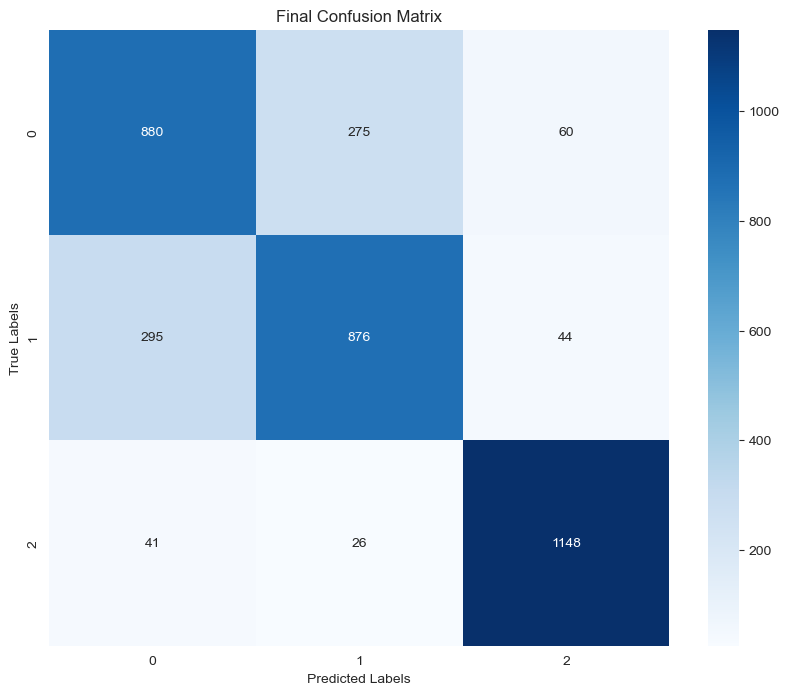

AttributeError: This 'StackingClassifier' has no attribute 'predict_proba'

In [33]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

svm = SVC(kernel='linear',random_state=42)

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets


# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=200, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=3)
base_classifier_xgb = xgb.XGBClassifier()

estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb)
]
meta_estimator = svm
stacking = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)
# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes
final_confusion_matrix = np.zeros((len(np.unique(y)), len(np.unique(y))))

# Fit the ensemble classifier on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    stacking.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = stacking.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])
    final_confusion_matrix += conf_matrix

    # Calculate specificity and sensitivity
    

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)


print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)



metrics2["Stacking Classifier with RF, KNN,and XGB Classifer (n estimator = 15)"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Stacking Classifier after SMOTE with Random Forest, KNN and XGBoost Classifer with n estimator as 15:")
print(metrics2["Stacking Classifier with RF, KNN,and XGB Classifer (n estimator = 15)"])
plt.figure(figsize=(10, 8))
sns.heatmap(final_confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Final Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
y_scores = stacking.predict_proba(X_test)

# Binarize the labels for ROC/AUC calculation
y_test_bin = label_binarize(y_test, classes=list(set(y_resampled)))

# Calculate ROC and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6), facecolor='white')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label='Micro-average (AUC = {:.2f})', color='white', linestyle=':')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification using Stacking Classifier')
plt.grid(color='white', linestyle='--')  # Set grid color and style

plt.legend(loc='lower right')
plt.show()




In [24]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']


svm_classifier = SVC(kernel='linear', C=1)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression_classifier = LogisticRegression(max_iter=1000)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
naive_bayes_classifier = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier()
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
bagging_classifier = BaggingClassifier(n_estimators=50, random_state=42)

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=3)
base_classifier_xgb = xgb.XGBClassifier()

estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb)
]
meta_estimator = logistic_regression_classifier
stacking = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)
# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes


# Fit the ensemble classifier on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    stacking.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = stacking.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])

    # Calculate specificity and sensitivity
    

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    
    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)



metrics2["Stacking Classifier with RF, KNN,and XGB Classifer (n estimator = 15)"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Specificity": mean_specificity
}

# Print the metrics
print("Metrics for Stacking Classifier after SMOTE with Random Forest, KNN and XGBoost Classifer with n estimator as 15:")
print(metrics2["Stacking Classifier with RF, KNN,and XGB Classifer (n estimator = 15)"])



Fold 1
Confusion Matrix:
 [[ 89  27   6]
 [ 31  84   6]
 [  1   2 118]]
Accuracy: 0.7835616438356164
Precision: 0.7785363358183184
Recall: 0.7835616438356164
F1 Score: 0.779914749443859
Specificity: 0.7783378276683809


Fold 2
Confusion Matrix:
 [[ 89  27   6]
 [ 31  84   6]
 [  1   2 118]]
Accuracy: 0.8082191780821918
Precision: 0.810650376403801
Recall: 0.8082191780821918
F1 Score: 0.8084042463452853
Specificity: 0.8103811710369088


Fold 3
Confusion Matrix:
 [[ 89  27   6]
 [ 31  84   6]
 [  1   2 118]]
Accuracy: 0.7561643835616438
Precision: 0.7565054011923245
Recall: 0.7561643835616438
F1 Score: 0.755793666951218
Specificity: 0.7562528249595585


Fold 4
Confusion Matrix:
 [[ 89  27   6]
 [ 31  84   6]
 [  1   2 118]]
Accuracy: 0.8054794520547945
Precision: 0.8068374310013424
Recall: 0.8054794520547945
F1 Score: 0.8055499859616067
Specificity: 0.8067123613726576


Fold 5
Confusion Matrix:
 [[ 89  27   6]
 [ 31  84   6]
 [  1   2 118]]
Accuracy: 0.7972602739726027
Precision: 0.79368

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=3)
base_classifier_xgb = xgb.XGBClassifier()
base_classifier_nb = GaussianNB()  # Multinomial Naive Bayes

# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb),
    ('nb', base_classifier_nb)  # Adding Multinomial Naive Bayes
], voting='soft')

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ensemble_classifier.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


metrics2["Bagging Classifier with RF, KNN, NB and XGB Classifer (n estimator = 100)"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Bagging Classifier after SMOTE with Random Forest, KNN, Naive Bayes and XGBoost Classifer with n estimator as 200:")
print(metrics2["Bagging Classifier with RF, KNN, NB and XGB Classifer (n estimator = 100)"])



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=3)
base_classifier_xgb = xgb.XGBClassifier()
base_classifier_nb = GaussianNB()  # Multinomial Naive Bayes

# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb),
    ('nb', base_classifier_nb)  # Adding Multinomial Naive Bayes
], voting='soft')

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ensemble_classifier.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


metrics2["Bagging Classifier with RF, KNN, NB and XGB Classifer (n estimator = 100)"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Bagging Classifier after SMOTE with Random Forest, KNN, Naive Bayes and XGBoost Classifer with n estimator as 200:")
print(metrics2["Bagging Classifier with RF, KNN, NB and XGB Classifer (n estimator = 100)"])



In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB

# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets


# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=200, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=2)
base_classifier_xgb = xgb.XGBClassifier()
base_classifier_nb = GaussianNB()  # Multinomial Naive Bayes

# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb),
    ('nb', base_classifier_nb)# Adding Multinomial Naive Bayes
], voting='soft')

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ensemble_classifier.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


metrics2["Bagging Classifier with RF, KNN, NB and XGB Classifer (n estimator = 200)"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Bagging Classifier after SMOTE with Random Forest, KNN, Naive Bayes and XGBoost Classifer with n estimator as 200:")
print(metrics2["Bagging Classifier with RF, KNN, NB and XGB Classifer (n estimator = 200)"])



In [ ]:
from tabulate import tabulate
table = []
for classifier, classifier_metrics in metrics.items():
    table.append([classifier] + [classifier_metrics[key] for key in ["Accuracy", "Precision", "Recall", "F1 Score","Sensitivity","Specificity"]])

# Print the tabulated metrics
headers = ["Classifier", "Accuracy", "Precision", "Recall", "F1 Score","Sensitivity","Specificity"]
print(tabulate(table, headers, tablefmt="fancy_grid"))

df2 = pd.DataFrame(table, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1 Score", "Sensitivity", "Specificity"])

# Save the DataFrame to a CSV file
df2.to_csv("metrics_table31.csv", index=False)

In [ ]:
from tabulate import tabulate
table2 = []
for classifier, classifier_metrics in metrics2.items():
    table2.append([classifier] + [classifier_metrics[key] for key in ["Accuracy", "Precision", "Recall", "F1 Score","Sensitivity","Specificity"]])

# Print the tabulated metrics
headers = ["Classifier", "Accuracy", "Precision", "Recall", "F1 Score","Specificity","Specificity"]
print(tabulate(table2, headers, tablefmt="fancy_grid"))
df = pd.DataFrame(table2, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1 Score", "Sensitivity", "Specificity"])

# Save the DataFrame to a CSV file
df.to_csv("metrics_table32.csv", index=False)



Fold 1
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   6]
 [  1   2 118]]
Accuracy: 0.7972602739726027
Precision: 0.7932839755709603
Recall: 0.7972602739726027
F1 Score: 0.7946431561793703
Specificity: 0.7930681333270115
Sensitivity: 0.5


Fold 2
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   6]
 [  1   2 118]]
Accuracy: 0.7972602739726027
Precision: 0.7990566319594867
Recall: 0.7972602739726027
F1 Score: 0.7973271781490959
Specificity: 0.7987922424632474
Sensitivity: 0.5


Fold 3
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   6]
 [  1   2 118]]
Accuracy: 0.7616438356164383
Precision: 0.76253970741591
Recall: 0.7616438356164383
F1 Score: 0.7609383326758958
Specificity: 0.7622916637486284
Sensitivity: 0.5


Fold 4
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   6]
 [  1   2 118]]
Accuracy: 0.810958904109589
Precision: 0.8123149623022192
Recall: 0.810958904109589
F1 Score: 0.811310107966759
Specificity: 0.8121447028423772
Sensitivity: 0.5


Fold 5
Confusion Matrix:
 [[ 90  26   6]
 [ 29  86   

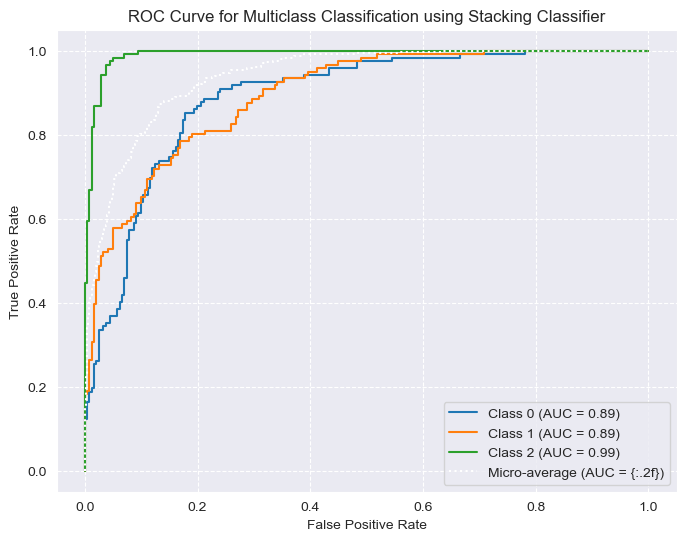

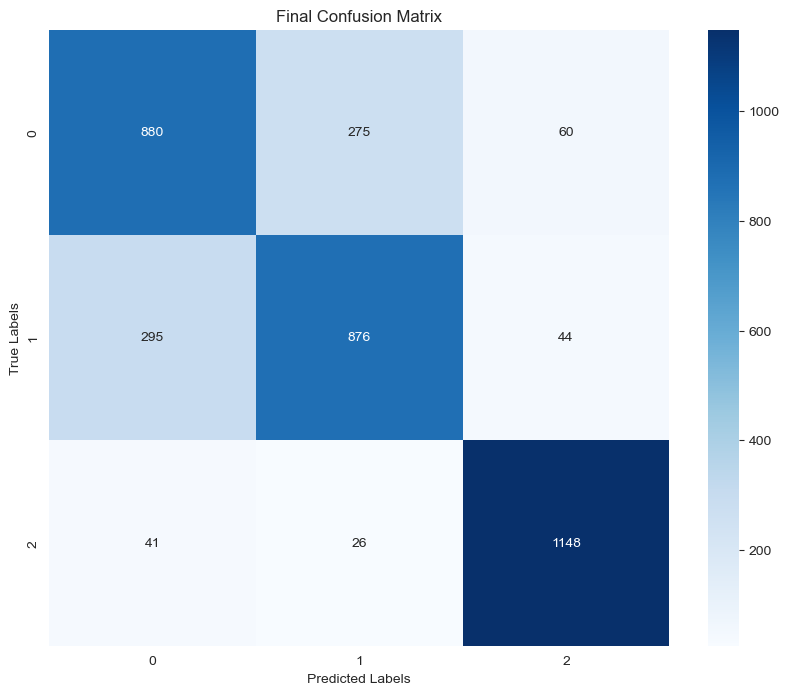

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Generate a synthetic dataset for demonstration
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

svm = SVC(kernel='linear',random_state=42)

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes


# Define base classifiers and stacking classifier


stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define base classifiers and stacking classifier
base_classifier_rf = RandomForestClassifier(n_estimators=200, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=3)
base_classifier_xgb = xgb.XGBClassifier()

estimators = [
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb)
]

meta_estimator = SVC(kernel='linear', probability=True, random_state=42)
stacking = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)
final_confusion_matrix = np.zeros((len(np.unique(y)), len(np.unique(y))))

# Initialize variables for cross-validation metrics
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []

# Cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    stacking.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = stacking.predict(X_test)

    # Evaluate the model's performance
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = np.mean([conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))])
    final_confusion_matrix += conf_matrix

    # Calculate specificity and sensitivity
    

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)


print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)

# Make predictions on the test data using the ensemble model
y_scores = stacking.predict_proba(X_test)

# Binarize the labels for ROC/AUC calculation
y_test_bin = label_binarize(y_test, classes=list(set(y_resampled)))

# Calculate ROC and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6), facecolor='white')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label='Micro-average (AUC = {:.2f})', color='white', linestyle=':')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification using Stacking Classifier')
plt.grid(color='white', linestyle='--')  # Set grid color and style

plt.legend(loc='lower right')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(final_confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Final Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
y_scores = stacking.predict_proba(X_test)

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder

# Load and preprocess your data
# Ensure X, y are defined
# X, y = ...
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Encoding categorical features
label_encoders = {}
for column in ['Ball Type', 'Prev_ball_type', 'Previ_shot_type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define base classifiers for the stacking ensemble
base_classifier_rf = RandomForestClassifier(n_estimators=200, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=3)
base_classifier_xgb = xgb.XGBClassifier()

# Define the stacking ensemble
estimators = [
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb)
]
meta_estimator = SVC(kernel='linear', probability=True, random_state=42)
stacking = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)

# Initialize variables for cross-validation metrics
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
specificity_scores = []

# Perform cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    # Split data
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model and make predictions
    stacking.fit(X_train, y_train)
    y_pred = stacking.predict(X_test)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Specificity (calculated per class and averaged)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_specificities = [conf_matrix[i][i] / (conf_matrix[i][i] + np.sum(conf_matrix[:, i]) - conf_matrix[i][i]) 
                           for i in range(len(conf_matrix))]
    specificity_scores.append(np.mean(class_specificities))

# Calculate average metrics across all folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)
average_specificity = np.mean(specificity_scores)

# Print average metrics
print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average Specificity:", average_specificity)

# Split data for ROC/AUC calculation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fit the model on training data
stacking.fit(X_train, y_train)

# Predict probabilities for ROC/AUC
y_scores = stacking.predict_proba(X_test)

# Binarize the labels for ROC/AUC calculation
y_test_bin = label_binarize(y_test, classes=list(set(y_resampled)))

# Calculate ROC and AUC for each class
n_classes = y_test_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()


AttributeError: 'numpy.float64' object has no attribute 'append'

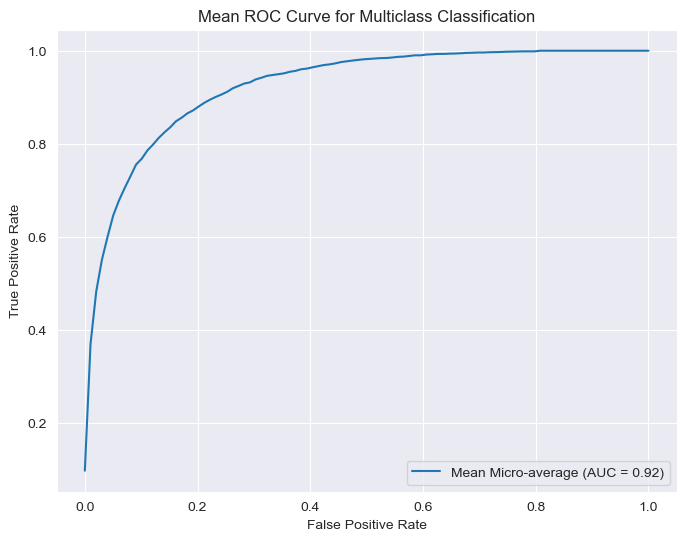

In [36]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Generate a synthetic dataset for demonstration
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'Current_score', 'Target', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Use StratifiedKFold for stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define and initialize the base classifiers
base_classifier_rf = RandomForestClassifier(n_estimators=15, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=2)
base_classifier_xgb = xgb.XGBClassifier()

ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb)
], voting='soft')

# Initialize variables to store ROC information
all_fpr = []
mean_tpr = []
mean_auc_micro = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the ensemble classifier on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data using the ensemble model
    y_scores = ensemble_classifier.predict_proba(X_test)

    # Binarize the labels for ROC/AUC calculation
    y_test_bin = label_binarize(y_test, classes=list(set(y_resampled)))

    # Calculate ROC and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Store information for plotting
    all_fpr.append(fpr["micro"])
    mean_tpr.append(tpr["micro"])
    mean_auc_micro.append(roc_auc["micro"])

# Plot mean ROC curve and ROC AUC
# Plot mean ROC curve and ROC AUC
plt.figure(figsize=(8, 6))

# Interpolate mean values to have the same length
mean_fpr_interp = np.linspace(0, 1, 100)  # Adjust 100 based on your preference
mean_tpr_interp = np.zeros_like(mean_fpr_interp)

for fpr_fold, tpr_fold in zip(all_fpr, mean_tpr):
    mean_tpr_interp += np.interp(mean_fpr_interp, fpr_fold, tpr_fold)

mean_tpr_interp /= len(all_fpr)

# Calculate AUC for the interpolated mean ROC curve
mean_auc_interp = auc(mean_fpr_interp, mean_tpr_interp)

plt.plot(mean_fpr_interp, mean_tpr_interp, label='Mean Micro-average (AUC = {:.2f})'.format(mean_auc_interp))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


In [47]:
import shap
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB

# Assuming you have X and y already loaded
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'Current_score', 'Target', 'Ball Type', 'Prev_ball_type', 'Previ_shot_type']]
y = matches['Shot Type']

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=200, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=2)
base_classifier_xgb = xgb.XGBClassifier()
base_classifier_nb = MultinomialNB()  # Multinomial Naive Bayes

# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb),
    ('nb', base_classifier_nb)
], voting='soft')

# Fit the ensemble classifier on the entire resampled dataset


stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Create a SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(ensemble_classifier.predict_proba, X_resampled)

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
    ensemble_classifier.fit(X_train, y_test)

    # Make predictions on the test data
    y_pred = ensemble_classifier.predict(X_test)

    # Explain the model's predictions using SHAP values
    shap_values = explainer.shap_values(X_test)

    # Print SHAP summary plot
    shap.summary_plot(shap_values, X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


Provided model function fails when applied to the provided data set.


NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [53]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB

# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets


# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=200, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=2)
base_classifier_xgb = xgb.XGBClassifier()
base_classifier_nb = MultinomialNB()  # Multinomial Naive Bayes

# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb)  # Adding Multinomial Naive Bayes
], voting='soft')

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ensemble_classifier.predict(X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


metrics2["Bagging Classifier with RF, KNN, NB and XGB Classifer (n estimator = 200)"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Bagging Classifier after SMOTE with Random Forest, KNN, Naive Bayes and XGBoost Classifer with n estimator as 200:")
print(metrics2["Bagging Classifier with RF, KNN, NB and XGB Classifer (n estimator = 200)"])



Fold 1
Confusion Matrix:
 [[ 81  27  13]
 [ 27  89   6]
 [  2   0 120]]
Accuracy: 0.7945205479452054
Precision: 0.7891155870768666
Recall: 0.7945205479452054
F1 Score: 0.7898212284441412
Specificity: 0.75
Sensitivity: 0.7672413793103449


Fold 2
Confusion Matrix:
 [[ 86  24  11]
 [ 28  86   8]
 [  2   4 116]]
Accuracy: 0.7890410958904109
Precision: 0.7851277093168547
Recall: 0.7890410958904109
F1 Score: 0.7859230025991607
Specificity: 0.7818181818181819
Sensitivity: 0.7543859649122807


Fold 3
Confusion Matrix:
 [[ 77  29  15]
 [ 30  84   8]
 [  4   4 114]]
Accuracy: 0.7534246575342466
Precision: 0.7480682978133233
Recall: 0.7534246575342466
F1 Score: 0.749243756412759
Specificity: 0.7264150943396226
Sensitivity: 0.7368421052631579


Fold 4
Confusion Matrix:
 [[ 80  33   8]
 [ 21  98   3]
 [  2   4 116]]
Accuracy: 0.8054794520547945
Precision: 0.8054153872695248
Recall: 0.8054794520547945
F1 Score: 0.8031289197696312
Specificity: 0.7079646017699115
Sensitivity: 0.8235294117647058


Fol

In [54]:
import shap
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB

# Assuming you have X and y already loaded
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=15, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=2)
base_classifier_xgb = xgb.XGBClassifier()
  # Multinomial Naive Bayes

# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb)# Adding Multinomial Naive Bayes
], voting='soft')
# Fit the ensemble classifier on the entire resampled dataset


stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []

# Create a SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(ensemble_classifier.predict_proba, X_resampled)

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
    ensemble_classifier.fit(X_train, y_test)

    # Make predictions on the test data
    y_pred = ensemble_classifier.predict(X_test)

    # Explain the model's predictions using SHAP values
    shap_values = explainer.shap_values(X_test)

    # Print SHAP summary plot
    shap.summary_plot(shap_values, X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


Provided model function fails when applied to the provided data set.


NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Using 3645 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/365 [00:00<?, ?it/s]

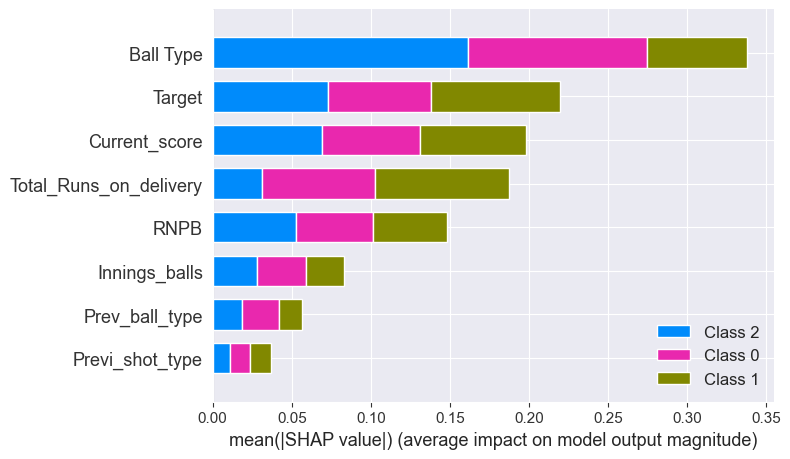

Fold 1
Confusion Matrix:
 [[109   7   5]
 [  3 116   3]
 [  1   0 121]]
Accuracy: 0.947945205479452
Precision: 0.948514611658985
Recall: 0.947945205479452
F1 Score: 0.9476123954704349
Specificity: 0.9396551724137931
Sensitivity: 0.9747899159663865




  0%|          | 0/365 [00:00<?, ?it/s]

In [ ]:
import shap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB

# Load your data and perform SMOTE
X = matches[['Total_Runs_on_delivery', 'Innings_balls', 'RNPB', 'Current_score','Target','Ball Type','Prev_ball_type','Previ_shot_type']]
y = matches['Shot Type']

# Assuming you have X and y already loaded

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create base classifiers (Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes)
base_classifier_rf = RandomForestClassifier(n_estimators=15, random_state=42)
base_classifier_knn = KNeighborsClassifier(n_neighbors=2)
base_classifier_xgb = xgb.XGBClassifier()
  # Multinomial Naive Bayes

# Create a VotingClassifier that combines Random Forest, K-Nearest Neighbors, XGBoost, and Multinomial Naive Bayes
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', base_classifier_rf),
    ('knn', base_classifier_knn),
    ('xgb', base_classifier_xgb)# Adding Multinomial Naive Bayes
], voting='soft')

# Fit the ensemble classifier on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
sensitivity_scores = []
ensemble_classifier.fit(X_train, y_train)
explainer = shap.KernelExplainer(ensemble_classifier.predict_proba, X_resampled)

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model on the training data
    

    # Make predictions on the test data
    y_pred = ensemble_classifier.predict(X_test)
    
    shap_values = explainer.shap_values(X_test)

    # Print SHAP summary plot
    shap.summary_plot(shap_values, X_test)

    # Evaluate the model's performance
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate specificity and sensitivity
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print metrics for the current fold
    print(f"Fold {fold}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("\n")

# Calculate and print mean scores across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)


metrics2["Bagging Classifier with RF, KNN,and XGB Classifer (n estimator = 15)"] = {
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1 Score": mean_f1,
    "Sensitivity": mean_specificity,
    "Specificity": mean_sensitivity
}

# Print the metrics
print("Metrics for Bagging Classifier after SMOTE with Random Forest, KNN and XGBoost Classifer with n estimator as 15:")
print(metrics2["Bagging Classifier with RF, KNN,and XGB Classifer (n estimator = 15)"])

